In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.spatial.distance import correlation

In [53]:
train = pd.read_csv('train.csv')

综合以下的分析，还是方法二最好。以下对方法二进行写法优化。

In [83]:
import regex as re

def get_title(name):
    title_search = re.search('([A-Za-z]+)\.', name)
    
    if title_search:
        return title_search.group(1)
    return""

titles = train["Name"].apply(get_title)
train["Title"]=titles

def generalize_titles(frame):
    title = frame['Title']
    if title in ['Mr','Sir']:
                 return '1'
    elif title in ['Miss','Mlle']:
                 return '3'
    elif title in ['Mrs','Mme','Ms','Lady','Countess']:
                 return '4'
    else:
        return '2'
    return title

train['Title'] = train.apply(generalize_titles, axis=1)

train = train.astype(dtype = {"Title":"int64"})

# 分类方法对比

方法一：把title分成有社会地位和无社会地位，分别用0和1代表

In [80]:
# (1)Get title
import regex as re

def get_title(name):
    title_search = re.search('([A-Za-z]+)\.', name)
    
    if title_search:
        return title_search.group(1)
    return""

titles = train["Name"].apply(get_title)
print(pd.value_counts(titles))

# Generalize title: 把title分成有社会地位和无社会地位，分别用0和1代表
title_mapping = {"Mr": 1, "Miss": 1, "Mrs": 1, "Master": 0, "Dr": 0, "Rev": 0, "Major": 0, "Col": 0, "Mlle": 1, "Mme": 1, "Don": 0, "Lady": 1, "Countess": 0, "Jonkheer": 0, "Sir": 1, "Capt": 0, "Ms": 1}
for k,v in title_mapping.items():
    titles[titles == k] = v
    
train["Title"]=titles

# 把Title列的数据类型转变为int
train = train.astype(dtype = {"Title":"int64"})

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Lady          1
Countess      1
Jonkheer      1
Ms            1
Sir           1
Capt          1
Don           1
Mme           1
Name: Name, dtype: int64


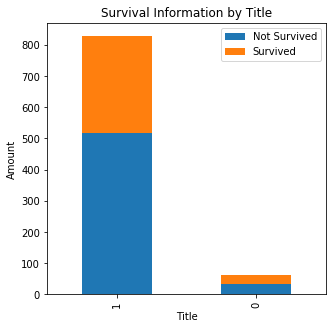

In [153]:
# plot
survived_1 = train.Title[train.Survived == 1].value_counts()
survived_0 = train.Title[train.Survived == 0].value_counts()
df = pd.DataFrame({u'Survived':survived_1, u'Not Survived':survived_0})
df.plot(kind = 'bar',stacked=True,width=0.5,figsize=(5,5))
plt.title(u'Survival Information by Title')
plt.xlabel(u'Title')
plt.ylabel(u'Amount')
plt.show()

In [154]:
# 用皮尔逊系数计算这样分类对生存率的影响
x = train.Title
y = train.Survived

# return Pearson's correlation coefficient, 2-tailed p-value) 
pearsonr(x,y)

#得到的结果表面title和生存率没有线性关系，但是不能排除有非线性关系，再用Distance Correlation跑一下，看看会不会有差别

(-0.051046321544167293, 0.12786703866625065)

In [155]:
# 用distance correlation看title和最后结果的关系

trainx = train['Title']
trainy = train['Survived']

x = trainx.as_matrix()
y = trainy.as_matrix()

correlation(x,y)

# Correlational distance goes from 0 - 2, with 0 being PERFECT correlation, 1 being no correlation, and 2 being PERFECT ANTICORRELATION.
# So a small correlational distance value means close together in correlational space (small angular difference). Corr = 1 – dist; Corr dist = 1 – corr; 
# so while a high correlation = high relationship; LOW CORR DISTINANCE = high relationship
# 最终的值是1.05，说明这样分类跟survival没有很大的关系

1.0510463215441672

方法二：先分成男女，再用影响每个性别生还率的因素把性别内部分成两类
1-Male without status, 2-Male with status, 3-Female Unmarried, 4-Female Married + Female with status

In [ ]:
import regex as re

def get_title(name):
    title_search = re.search('([A-Za-z]+)\.', name)
    
    if title_search:
        return title_search.group(1)
    return""

titles = train["Name"].apply(get_title)
print(pd.value_counts(titles))

title_mapping = {"Mr": 1, "Miss": 3, "Mrs": 4, "Master": 2, "Dr": 2, "Rev": 2, "Major": 2, "Col": 2, "Mlle": 3, "Mme": 4, "Don": 2, "Lady": 4, "Countess": 4, "Jonkheer": 2, "Sir": 1, "Capt": 2, "Ms": 4}
for k,v in title_mapping.items():
    titles[titles == k] = v

train["Title"]=titles

# 把Title列的数据类型转变为int
train = train.astype(dtype = {"Title":"int64"})

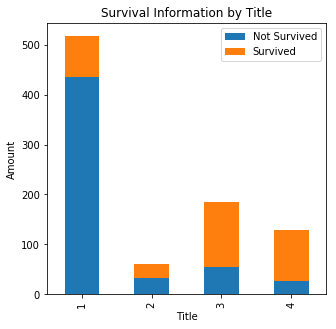

In [146]:
survived_1 = train.Title[train.Survived == 1].value_counts()
survived_0 = train.Title[train.Survived == 0].value_counts()
df = pd.DataFrame({u'Survived':survived_1, u'Not Survived':survived_0})
df.plot(kind = 'bar',stacked=True,width=0.5,figsize=(5,5))
plt.title(u'Survival Information by Title')
plt.xlabel(u'Title')
plt.ylabel(u'Amount')
plt.show()

In [147]:
# 用皮尔逊系数计算这样分类对生存率的影响
x = train.Title
y = train.Survived

# return Pearson's correlation coefficient, 2-tailed p-value) 
pearsonr(x,y)

#结果表明两者有比较明显的线性关系，系数大于0.6就可以表示非常显著了

(0.55845512465171021, 3.336161302184094e-74)

In [148]:
# 用distance correlation看title和最后结果的关系

trainx = train['Title']
trainy = train['Survived']

x = trainx.as_matrix()
y = trainy.as_matrix()

correlation(x,y)

0.4415448753482899

方法三：分成三类，1- Mr,Sir; 2-Miss,Mrs,Mlle,Lady,Mme,Ms; 3-rare titles

In [ ]:
import regex as re

def get_title(name):
    title_search = re.search('([A-Za-z]+)\.', name)
    
    if title_search:
        return title_search.group(1)
    return""

titles = train["Name"].apply(get_title)
print(pd.value_counts(titles))

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 2, "Master": 3, "Dr": 3, "Rev": 3, "Major": 3, "Col": 3, "Mlle": 1, "Mme": 2, "Don": 3, "Lady": 2, "Countess": 3, "Jonkheer": 3, "Sir": 1, "Capt": 3, "Ms": 2}
for k,v in title_mapping.items():
    titles[titles == k] = v
    
train["Title"]=titles

# 把Title列的数据类型转变为int
train = train.astype(dtype = {"Title":"int64"})

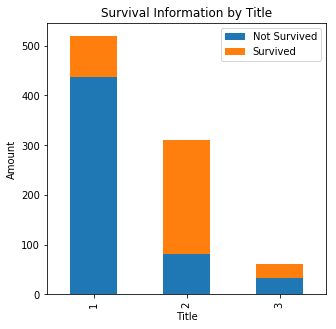

In [157]:
# plot
survived_1 = train.Title[train.Survived == 1].value_counts()
survived_0 = train.Title[train.Survived == 0].value_counts()
df = pd.DataFrame({u'Survived':survived_1, u'Not Survived':survived_0})
df.plot(kind = 'bar',stacked=True,width=0.5,figsize=(5,5))
plt.title(u'Survival Information by Title')
plt.xlabel(u'Title')
plt.ylabel(u'Amount')
plt.show()

In [158]:
# 用皮尔逊系数计算这样分类对生存率的影响
x = train.Title
y = train.Survived

# return Pearson's correlation coefficient, 2-tailed p-value) 
pearsonr(x,y)

(0.4497320397462386, 1.4130395601885047e-45)

In [159]:
# 用distance correlation看title和最后结果的关系

trainx = train['Title']
trainy = train['Survived']

x = trainx.as_matrix()
y = trainy.as_matrix()

correlation(x,y)

0.55026796025376146

方法四：考虑到‘Mother’不影响生还率，所以根据是否结婚来对女性进行分类也就不太合理，但是title的确是可以影响男性的生还率，这里提出方法四，把所有title分成三类，1-male with status, 2-male without status, 3-female

In [74]:
import regex as re

train['Sex'].replace('female',0,inplace=True)
train['Sex'].replace('male',1,inplace =True)

def get_title(name):
    title_search = re.search('([A-Za-z]+)\.', name)
    
    if title_search:
        return title_search.group(1)
    return""

titles = train["Name"].apply(get_title)
print(pd.value_counts(titles))

train['Title']=titles

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Lady          1
Countess      1
Jonkheer      1
Ms            1
Sir           1
Capt          1
Don           1
Mme           1
Name: Name, dtype: int64


In [79]:
def generalize_titles(frame):
    title = frame['Title']
    if title in ['Rev','Major','Col','Don','Capt','Jonkheer','Master','Dr']:
                 return '1'
    elif title in ['Mr','Sir']:
                 return '2'
    elif title in ['Miss','Mrs','Mlle','Mme','Ms','Lady','Countess']:
                 return '3'
    else:
        return '1'
    return title

train['Title'] = train.apply(generalize_titles, axis=1)
train = train.astype(dtype = {"Title":"int64"})

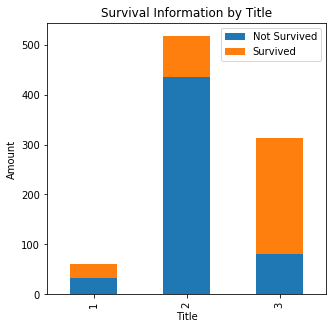

In [76]:
survived_1 = train.Title[train.Survived == 1].value_counts()
survived_0 = train.Title[train.Survived == 0].value_counts()
df = pd.DataFrame({u'Survived':survived_1, u'Not Survived':survived_0})
df.plot(kind = 'bar',stacked=True,width=0.5,figsize=(5,5))
plt.title(u'Survival Information by Title')
plt.xlabel(u'Title')
plt.ylabel(u'Amount')
plt.show()

In [77]:
x = train.Title
y = train.Survived
# return Pearson's correlation coefficient, 2-tailed p-value) 
pearsonr(x,y)

(0.42430015367610319, 3.0237790796785538e-40)

In [78]:
# 用distance correlation看title和最后结果的关系

trainx = train['Title']
trainy = train['Survived']

x = trainx.as_matrix()
y = trainy.as_matrix()

correlation(x,y)

0.57569984632389681